In [65]:
!pip install category_encoders

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce

In [67]:
#df = pd.read_csv("C:/Users/user/Desktop/homework/hw3/weatherAUS.csv", sep=',')

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/weatherAUS.csv", sep=',')

# Analysis

In [70]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,145460,3436,2013-11-12,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,145460,49,Canberra,3436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MinTemp,143975.0,NaN,NaN,NaN,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,NaN,NaN,NaN,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,NaN,NaN,NaN,2.360918,8.47806,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,NaN,NaN,NaN,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,NaN,NaN,NaN,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustDir,135134,16,W,9915,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WindGustSpeed,135197.0,NaN,NaN,NaN,40.03523,13.607062,6.0,31.0,39.0,48.0,135.0
WindDir9am,134894,16,N,11758,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The dataset includes both categorical (object) and numerical (int/float) variables. It's worth mentioning that certain columns have missing values.

In [71]:
df['Date'] = pd.to_datetime(df['Date'])

# Extracting Weekday and Month into separate columns
df['Weekday'] = df['Date'].dt.dayofweek  # Monday=0, Sunday=6
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [72]:
print("Duplicated rows : ", df.duplicated().sum())

Duplicated rows :  0


## Categorical

In [73]:
df.describe(include=['object'])

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,135134,134894,141232,142199,142193
unique,49,16,16,16,2,2
top,Canberra,W,N,SE,No,No
freq,3436,9915,11758,10838,110319,110316


In [74]:
df['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [75]:
df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [76]:
df['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [77]:
df['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

The dataset comprises records from 3436 distinct dates across 49 diverse regions. The number of unique variables related to wind and rain remains constant.

Fortunately, there are no categorical variables with high cardinality, which is beneficial since elevated cardinality can present challenges for the machine learning model.

In [78]:
def plot_distribution(data, column):
    """
    Plots the distribution of a variable in bars with probabilities on the y-axis.

    Parameters:
    - data: Pandas DataFrame containing the dataset
    - column: Name of the column to visualize

    Returns:
    - None (displays the plot)
    """

    sns.set(style="whitegrid")

    probabilities = data[column].value_counts(normalize=True)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=probabilities.index, y=probabilities.values, palette="Set2")

    plt.xlabel(column)
    plt.ylabel("Probability")
    plt.title(f"Distribution of {column}")

    plt.show()

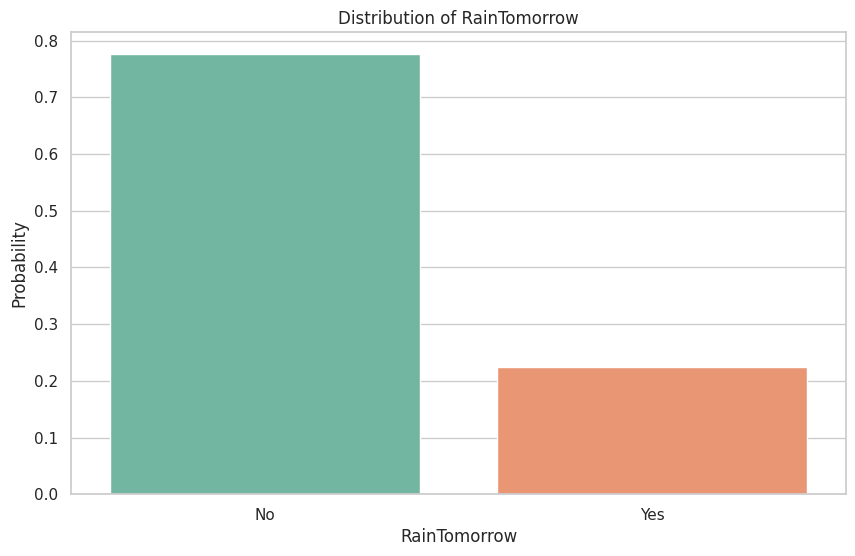

In [79]:
plot_distribution(df, 'RainTomorrow')

In [80]:
print(df["RainToday"].value_counts(normalize=True))

No     0.775807
Yes    0.224193
Name: RainToday, dtype: float64


I notice an imbalance in the class distribution that may impact the effectiveness of my modeling. This imbalance has the potential to introduce bias in predictions, showing a preference for the majority class. To tackle this issue, I plan to conduct rebalancing.

In [81]:
count_par_region = df['Location'].value_counts()
# Calculate the percentage of observations by region
percentage_par_region = (count_par_region / len(df)) * 100
percentage_par_region

Canberra            2.362161
Sydney              2.298914
Darwin              2.195105
Melbourne           2.195105
Brisbane            2.195105
Adelaide            2.195105
Perth               2.195105
Hobart              2.195105
Albany              2.089922
MountGambier        2.089922
Ballarat            2.089922
Townsville          2.089922
GoldCoast           2.089922
Cairns              2.089922
Launceston          2.089922
AliceSprings        2.089922
Bendigo             2.089922
Albury              2.089922
MountGinini         2.089922
Wollongong          2.089922
Newcastle           2.089234
Tuggeranong         2.089234
Penrith             2.089234
Woomera             2.068610
Nuriootpa           2.068610
Cobar               2.068610
CoffsHarbour        2.068610
Moree               2.068610
Sale                2.068610
PerthAirport        2.068610
PearceRAAF          2.068610
Witchcliffe         2.068610
BadgerysCreek       2.068610
Mildura             2.068610
NorfolkIsland 

The variation in data volume across regions can be attributed to the staggered installation of weather stations or sensors, resulting in uneven coverage over time.

## Numeric

In [82]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


Temporal Coverage: The dataset spans about 10 years

Target Variable (Precipitation): The recorded precipitation values range from 0.0 mm to 371.0 mm. On average, the dataset indicates a precipitation level of 2.36 mm. The standard deviation of 8.48 mm implies notable day-to-day variability in rainfall amounts.

The observed values align with typical meteorological patterns. Nevertheless, certain instances of extreme values warrant additional scrutiny to verify their accuracy.

Units Used in the Dataset:

- Temperatures: Recorded in degrees Celsius (°C).
- Rainfall: Quantity of rainfall denoted in millimeters (mm).
- Evaporation: Amount of water evaporated within a specified period, usually 24 hours, expressed in millimeters (mm).
- Wind Speed: Measured in kilometers per hour (km/h).
- Humidity: Relative air humidity represented as a percentage (%).
- Pressure: Atmospheric pressure recorded in hectopascals (hPa).
- Cloudiness: Assessed on a scale, typically ranging from 0 to 9, indicating the extent of cloud cover.

# DP

In [83]:
print("Percentage of missing values for numerical variables:")
print((df.select_dtypes(include=['float64', 'int64']).isnull().mean() * 100).sort_values(ascending=False))

# Percentage of missing values for categorical variables
print("\nPercentage of missing values for categorical variables:")
print((df.select_dtypes(include=['object']).isnull().mean() * 100).sort_values(ascending=False))

Percentage of missing values for numerical variables:
Sunshine         48.009762
Evaporation      43.166506
Cloud3pm         40.807095
Cloud9am         38.421559
Pressure9am      10.356799
Pressure3pm      10.331363
WindGustSpeed     7.055548
Humidity3pm       3.098446
Temp3pm           2.481094
Rainfall          2.241853
WindSpeed3pm      2.105046
Humidity9am       1.824557
Temp9am           1.214767
WindSpeed9am      1.214767
MinTemp           1.020899
MaxTemp           0.866905
Weekday           0.000000
Month             0.000000
Year              0.000000
dtype: float64

Percentage of missing values for categorical variables:
WindDir9am      7.263853
WindGustDir     7.098859
WindDir3pm      2.906641
RainTomorrow    2.245978
RainToday       2.241853
Location        0.000000
dtype: float64


In numeric data we can distinguish such columns with a large amount of missing data:
- Sunshine         48.009762
- Evaporation      43.166506
- Cloud3pm         40.807095
- Cloud9am         38.421559
- Pressure9am      10.356799
- Pressure3pm      10.331363

In categoracl data:
- WindDir9am      7.263853
- WindGustDir     7.098859

In [84]:
df_clean = df.dropna(subset=["Rainfall", "RainToday", "RainTomorrow"])

For variables with low missing data (around 3% of the dataset), I plan to delete rows with any missing values in crucial columns such as Rainfall, RainToday, and RainTomorrow, given the dataset's considerable size.

In [85]:
# Define a condition for rows based on Rainfall and RainToday columns
condition = ((df_clean['Rainfall'] >= 1) & (df_clean['RainToday'] == 'Yes')) | ((df_clean['Rainfall'] < 1) & (df_clean['RainToday'] == 'No'))

# Update the 'RainToday' column for rows that do not satisfy the condition, setting their 'RainToday' value to 'Yes'
df_clean.loc[~condition, 'RainToday'] = 'Yes'

assigned the variable Rainfall correctly

In [86]:
# Retrieve Numeric and Categorical Columns
numeric_columns_list = df_clean.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_columns_list = df_clean.select_dtypes(include=['object']).columns.tolist()

# Group by Month and Region, then calculate the median for each numeric column
monthly_region_median = df_clean.groupby(['Month', 'Location'])[numeric_columns_list].median()

# Group by Month and Region, then calculate the mode for each categorical column
# For empty modes, use None; otherwise, use the mode value
monthly_region_mode = df_clean.groupby(['Month', 'Location'])[categorical_columns_list].agg(
    lambda x: x.mode().iloc[0] if not x.mode().empty else None
)

# Some regions may have no values for a given month. In such cases, fill missing values with overall median/mode
monthly_region_median.fillna(monthly_region_median.mean(), inplace=True)
monthly_region_mode.fillna(monthly_region_mode.mode().iloc[0], inplace=True)


I use the median, not the mean, to address outliers in certain variables. The chosen missing data imputation method is effective for my goal, considering analysis needs. While more complex approaches exist, I opt for simplicity. Monthly imputation adequately captures seasonal trends. For month/region combinations with exclusively missing data, using data from a single or similar regions is an option.

In [87]:
numeric_var_null_percentage = df_clean.select_dtypes(include=['float64', 'int64']).isnull().mean() * 100
print("Percentage of missing values for numeric variables:")
print(numeric_var_null_percentage)

categorical_var_null_percentage = df_clean.select_dtypes(include=['object']).isnull().mean() * 100
print("\nPercentage of missing values for categorical variables:")
print(categorical_var_null_percentage)

Percentage of missing values for numeric variables:
MinTemp           0.332417
MaxTemp           0.218060
Rainfall          0.000000
Evaporation      42.400222
Sunshine         47.451114
WindGustSpeed     6.467216
WindSpeed9am      0.749359
WindSpeed3pm      1.797751
Humidity9am       1.077514
Humidity3pm       2.486735
Pressure9am       9.761555
Pressure3pm       9.780022
Cloud9am         37.379161
Cloud3pm         39.843167
Temp9am           0.465952
Temp3pm           1.863808
Weekday           0.000000
Month             0.000000
Year              0.000000
dtype: float64

Percentage of missing values for categorical variables:
Location        0.000000
WindGustDir     6.508413
WindDir9am      6.861429
WindDir3pm      2.606775
RainToday       0.000000
RainTomorrow    0.000000
dtype: float64


In [88]:
def fillna_udf(row: pd.Series, dataframe_for_fill: pd.DataFrame, columns: list) -> pd.Series:

    location = row['Location']  # Get the value from the 'region' column of the row
    month = row['Month']    # Get the value from the 'month' column of the row

    # Get the corresponding row in the DataFrame containing replacement mode/median
    impute_row = dataframe_for_fill.loc[(month, location)]

    # Replace missing values with medians/modes
    for col in columns:
        if pd.isna(row[col]):
            row[col] = impute_row[col]
    return row

# Apply the fillna_udf function to each row of df_clean for numeric columns
df_clean = df_clean.apply(lambda row: fillna_udf(row, monthly_region_median, numeric_columns_list), axis=1)
print("ok1")
# Apply the fillna_udf function to each row of df_clean for categorical columns
df_clean = df_clean.apply(lambda row: fillna_udf(row, monthly_region_mode, categorical_columns_list), axis=1)
print("ok2")

ok1
ok2


In [89]:
numeric_var_null_percentage = df_clean.select_dtypes(include=['float64', 'int64']).isnull().mean() * 100
print("Percentage of missing values for numeric variables:")
print(numeric_var_null_percentage)

categorical_var_null_percentage = df_clean.select_dtypes(include=['object']).isnull().mean() * 100
print("\nPercentage of missing values for categorical variables:")
print(categorical_var_null_percentage)

Percentage of missing values for numeric variables:
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustSpeed    0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
Weekday          0.0
Month            0.0
Year             0.0
dtype: float64

Percentage of missing values for categorical variables:
Location        0.0
WindGustDir     0.0
WindDir9am      0.0
WindDir3pm      0.0
RainToday       0.0
RainTomorrow    0.0
dtype: float64


### Outliers

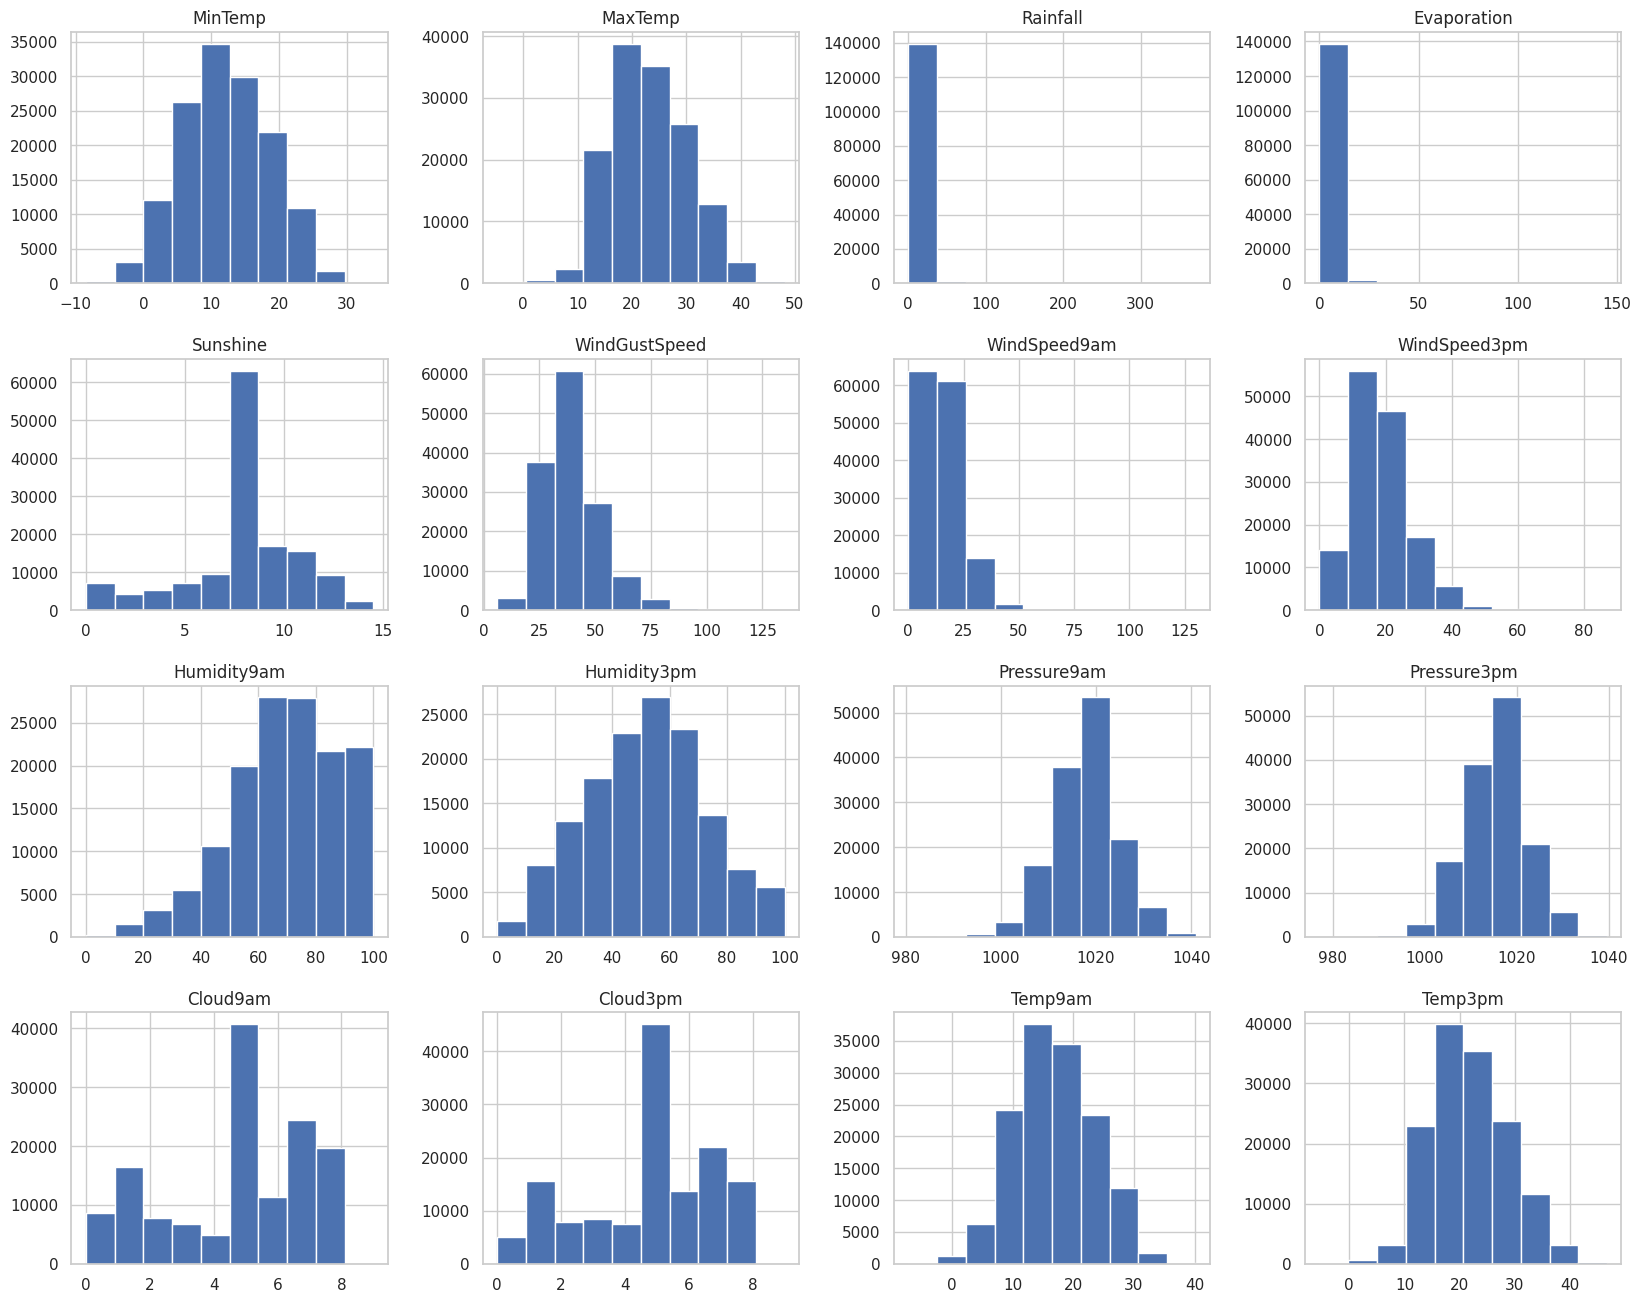

In [90]:
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
columns_to_exclude = ['Weekday', 'Month', 'Year']
numeric_cols_outlier = [col for col in numeric_cols if col not in columns_to_exclude]
df_clean[numeric_cols_outlier].hist(figsize=(20,16))
plt.show()

I identify outliers in Evaporation and WindSpeed9am. While I refrain from capping the target variable to preserve its distribution and avoid bias, I cap outliers in Evaporation and WindSpeed9am. This maintains analysis robustness, reduces potential measurement error influence, and allows a clearer understanding of the studied phenomenon. Capping is based on the interquartile range due to the skewed distribution of these variables.

In [91]:
def cap_outliers_interquartile_range(data_frame, columns_to_cap):
    for column in columns_to_cap:
        lower_bound = data_frame[column].quantile(0.25) - 1.5 * (data_frame[column].quantile(0.75) - data_frame[column].quantile(0.25))
        upper_bound = data_frame[column].quantile(0.75) + 1.5 * (data_frame[column].quantile(0.75) - data_frame[column].quantile(0.25))
        data_frame[column] = np.where(data_frame[column] < lower_bound, lower_bound, data_frame[column])
        data_frame[column] = np.where(data_frame[column] > upper_bound, upper_bound, data_frame[column])
    return data_frame

columns_to_capitalize = ['Evaporation', 'WindSpeed9am']

# Apply Interquartile Range (IQR) capping to outliers
cap_outliers_interquartile_range(df_clean, columns_to_capitalize).head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Weekday,Month,Year
0,2008-12-01,Albury,13.4,22.9,0.6,5.116752,8.5775,W,44.0,W,...,1007.1,8.0,5.0,16.9,21.8,No,No,0,12,2008
1,2008-12-02,Albury,7.4,25.1,0.0,5.116752,8.5775,WNW,44.0,NNW,...,1007.8,7.0,5.0,17.2,24.3,No,No,1,12,2008
2,2008-12-03,Albury,12.9,25.7,0.0,5.116752,8.5775,WSW,46.0,W,...,1008.7,7.0,2.0,21.0,23.2,No,No,2,12,2008
3,2008-12-04,Albury,9.2,28.0,0.0,5.116752,8.5775,NE,24.0,SE,...,1012.8,7.0,5.0,18.1,26.5,No,No,3,12,2008
4,2008-12-05,Albury,17.5,32.3,1.0,5.116752,8.5775,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,Yes,No,4,12,2008


I choose to cap, not remove, outliers to retain records of extreme data while mitigating their impact on analyses. While not explicitly aiming to detect natural disasters, these outliers may hold crucial information about exceptional events. Retaining them with a threshold value ensures analysis robustness without significant result distortion.

# Correlation

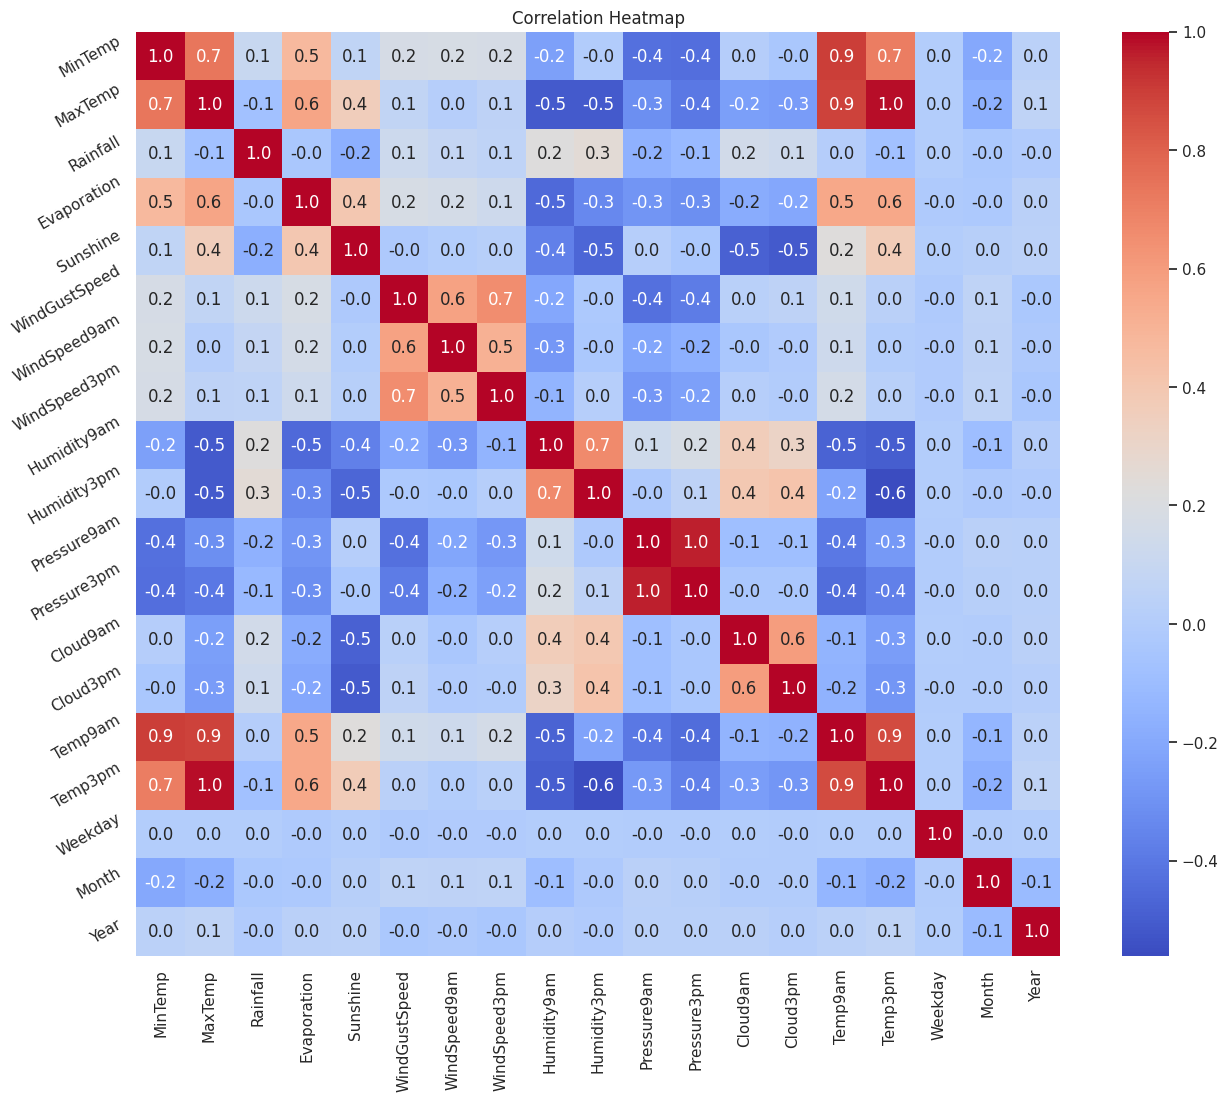

In [92]:
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap')
corr_matrix = df_clean[numeric_cols].corr()
corr_matrix["Rainfall"].sort_values(ascending=False)
ax = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, fmt='.1f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_xticklabels(), rotation=30)

plt.show()

Temperature variables (MinTemp, MaxTemp, Temp9pm, Temp3pm) display strong correlations, with MinTemp and Temp9pm showing a significant relationship (correlation of 0.90). Evaporation and Sunshine correlate positively with temperatures, while Sunshine has a negative correlation with clouds. Wind speeds (WindGustSpeed, WindSpeed9am, WindSpeed3pm) positively correlate, and Wind Gust Speed has a negative correlation with pressure. Humidity negatively correlates with temperatures. Pressure variables (Pressure9am, Pressure3pm) have a very high correlation. Clouds (Cloud9am, Cloud3pm) show a strong correlation. Overall, these correlations align with meteorological principles.

In [93]:
contingency_tables_dict = {}  # To store contingency tables

categorical_columns_for_contingency = ['WindGustDir', 'WindDir9am', 'WindDir3pm']

# Iterate through each categorical column
for categorical_column in categorical_columns_for_contingency:
    # Create the contingency table for the pair (categorical variable, target variable)
    contingency_table = pd.crosstab(df_clean[categorical_column], df_clean['RainTomorrow'], normalize='columns')

    # Store the contingency table in the dictionary
    contingency_tables_dict[categorical_column] = contingency_table

# Display all contingency tables
for categorical_column, table in contingency_tables_dict.items():
    print(f"Contingency table for {categorical_column} vs {'RainTomorrow'}:\n")
    print(table)
    print("\n")


Contingency table for WindGustDir vs RainTomorrow:

RainTomorrow        No       Yes
WindGustDir                     
E             0.111419  0.095125
ENE           0.063959  0.043460
ESE           0.055819  0.037691
N             0.060126  0.077850
NE            0.054222  0.044454
NNE           0.045261  0.046986
NNW           0.042870  0.059293
NW            0.054067  0.074357
S             0.063265  0.063331
SE            0.069617  0.055735
SSE           0.066660  0.056665
SSW           0.061322  0.059966
SW            0.064935  0.057082
W             0.070821  0.089997
WNW           0.053145  0.072434
WSW           0.062490  0.065575


Contingency table for WindDir9am vs RainTomorrow:

RainTomorrow        No       Yes
WindDir9am                      
E             0.074891  0.043268
ENE           0.059907  0.044069
ESE           0.061130  0.036217
N             0.080539  0.117881
NE            0.058584  0.052242
NNE           0.057361  0.069485
NNW           0.054879  0.081953
NW  

Upon examining the contingency table between wind direction/gusts and our target variable, no strong trend or obvious association between wind direction/gusts and the probability of rain the following day is evident.

In [94]:
rain_today_tomorrow_contingency_table = pd.crosstab(df_clean['RainToday'], df_clean['RainTomorrow'])
rain_today_tomorrow_contingency_table


RainTomorrow,No,Yes
RainToday,,
No,91529,16056
Yes,18057,15145


As anticipated, there appears to be an association between rainfall today and rainfall the following day.

In [95]:

def plot_precipitation_graph(df, x_column, y_column, secondary_y_column, title, x_label, y_label, secondary_y_label):
    # Calculate the average precipitation for each unique value in the x column
    average_x = df.groupby([x_column])[y_column].mean().reset_index()
    # Calculate the average for the secondary_y_column where the value is 'Yes'
    average_secondary = df.groupby([x_column])[secondary_y_column].apply(lambda x: (x == 'Yes').mean()).reset_index()

    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot the curve of the average precipitation against the x column
    ax1.plot(average_x[x_column], average_x[y_column], marker='o', linestyle='-', color='blue', label=f'Average {y_label}')
    ax1.set_xlabel(x_label)
    ax1.set_ylabel(y_label, color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.grid(True)

    # Create a second y-axis for the secondary graph
    ax2 = ax1.twinx()

    # Plot bars for the average of the secondary_y_column
    ax2.bar(average_x[x_column], average_secondary[secondary_y_column], color='orange', alpha=0.7, label=f'Average {secondary_y_label}')
    ax2.set_ylabel(secondary_y_label, color='orange')
    ax2.tick_params(axis='y')

    ax1.set_xticks(average_x[x_column])
    plt.title(title)

    # Combine the legends of both graphs
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines + lines2, labels + labels2, loc='upper right')

    plt.tight_layout()
    plt.show()


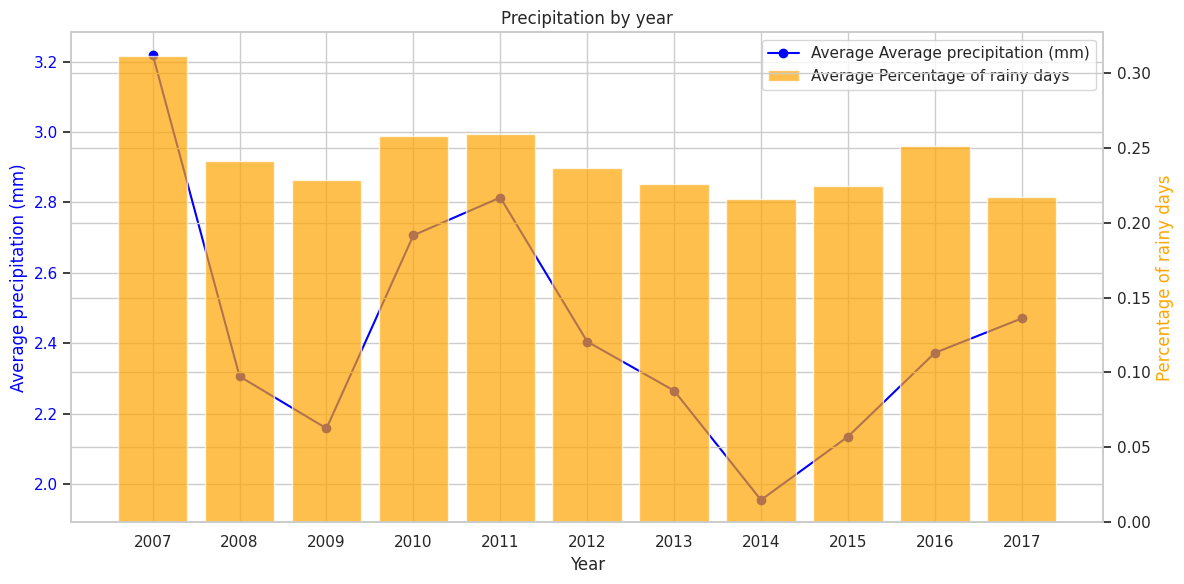

In [96]:
plot_precipitation_graph(df_clean, 'Year', 'Rainfall', 'RainToday', "Precipitation by year", 'Year', 'Average precipitation (mm)', 'Percentage of rainy days')

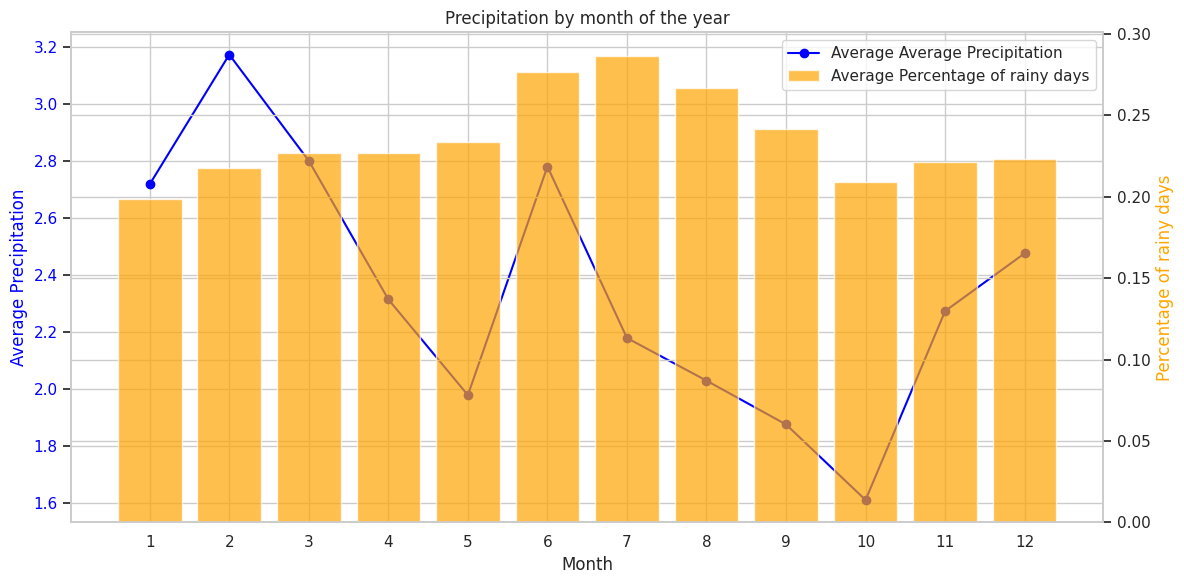

In [97]:
plot_precipitation_graph(df_clean, 'Month', 'Rainfall', 'RainToday', "Precipitation by month of the year", 'Month', 'Average Precipitation', 'Percentage of rainy days')

Over the years, the average precipitation remains fairly constant, fluctuating between 2.8 and 3.2 mm. The percentage of rainy days varies, influenced by the differing number of observations each year, with missing data for some regions in 2007. When examining months, summer months have higher average precipitation, but increased precipitation doesn't always correlate with more rainy days, except for June. Caution is advised in interpreting these findings due to data incompleteness in certain periods and regions.

# Modeling

In [98]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,140787.0,12.188119,6.400488,-8.5,7.6,12.000000,16.8,33.9
MaxTemp,140787.0,23.235811,7.112066,-4.8,17.9,22.600000,28.2,48.1
Rainfall,140787.0,2.349974,8.465173,0.0,0.0,0.000000,0.8,371.0
Evaporation,140787.0,4.948942,2.210017,0.3,3.6,5.116752,5.8,9.1
Sunshine,140787.0,8.094868,2.868427,0.0,7.5,8.577500,9.5,14.5
WindGustSpeed,140787.0,39.880922,13.154116,6.0,31.0,38.192376,46.0,135.0
WindSpeed9am,140787.0,13.884940,8.570180,0.0,7.0,13.000000,19.0,37.0
WindSpeed3pm,140787.0,18.561241,8.778564,0.0,13.0,19.000000,24.0,87.0
Humidity9am,140787.0,68.920646,19.051760,0.0,57.0,70.000000,83.0,100.0
Humidity3pm,140787.0,51.510928,20.708291,0.0,37.0,52.000000,66.0,100.0


In [99]:
df_clean=df_clean.drop(['Date'], axis=1)

We don't need column Data, because we have Weekday Month Year

In [100]:
df_clean.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Location,140787,49,Canberra,3402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MinTemp,140787.0,NaN,NaN,NaN,12.188119,6.400488,-8.5,7.6,12.0,16.8,33.9
MaxTemp,140787.0,NaN,NaN,NaN,23.235811,7.112066,-4.8,17.9,22.6,28.2,48.1
Rainfall,140787.0,NaN,NaN,NaN,2.349974,8.465173,0.0,0.0,0.0,0.8,371.0
Evaporation,140787.0,NaN,NaN,NaN,4.948942,2.210017,0.3,3.6,5.116752,5.8,9.1
Sunshine,140787.0,NaN,NaN,NaN,8.094868,2.868427,0.0,7.5,8.5775,9.5,14.5
WindGustDir,140787,16,E,15178,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WindGustSpeed,140787.0,NaN,NaN,NaN,39.880922,13.154116,6.0,31.0,38.192376,46.0,135.0
WindDir9am,140787,16,N,12504,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WindDir3pm,140787,16,SE,11567,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
categorical_columns=['Location','WindGustDir','WindDir9am','WindDir3pm']


## Logistic Regression

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from category_encoders import TargetEncoder



df_clean['RainTomorrow'] = df_clean['RainTomorrow'].map({'No': 0, 'Yes': 1})
df_clean['RainToday'] = df_clean['RainToday'].map({'No': 0, 'Yes': 1})

encoder = TargetEncoder()
label_encoder = LabelEncoder()

for col in ['WindGustDir', 'WindDir9am', 'WindDir3pm']:
    df_clean[col] = label_encoder.fit_transform(df_clean[col])


# Specify the column you want to encode ('Location' in this case)
col = 'Location'
df_clean[col] = encoder.fit_transform(df_clean[col], df_clean['RainTomorrow'])



X = df_clean.drop(columns=['RainTomorrow'])  # Features
y = df_clean['RainTomorrow']  # Target variable


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#print(X_train)

I used TargetEncoder(), because I have a categorical variable and want to capture its relationship with the target variable. And LabelEncoder because I want to convert categorical labels into numerical values

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, \
     recall_score, roc_curve, roc_auc_score, f1_score, classification_report

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f'Confusion Matrix:\n{cm}\n')

    # Plotting Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix')
    plt.show()
    print('\n')
    # Accuracy, Precision, Recall
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}')
    print('\n')
    # ROC Curve and AUC
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    print(f'ROC-AUC: {auc:.2f}')
    print('\n')
    # F1 and F-beta Score
    f1 = f1_score(y_test, y_pred)
    print(f'F1 Score: {f1:.2f}')
    print('\n')
    # Full classification report
    print('\nClassification Report:\n', classification_report(y_test, y_pred))

Logistic Regression Metrics:

Confusion Matrix:
[[20729  1168]
 [ 3231  3030]]



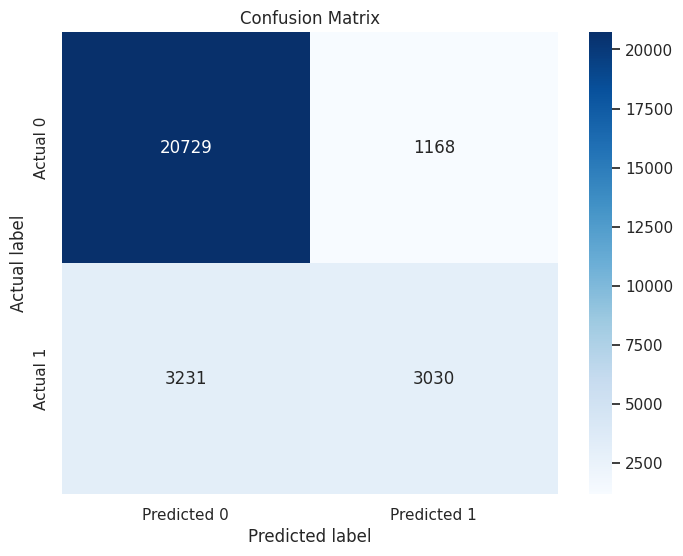



Accuracy: 0.84, Precision: 0.72, Recall: 0.48


ROC-AUC: 0.87


F1 Score: 0.58



Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.90     21897
           1       0.72      0.48      0.58      6261

    accuracy                           0.84     28158
   macro avg       0.79      0.72      0.74     28158
weighted avg       0.83      0.84      0.83     28158



In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression(penalty='l2', solver='newton-cholesky', max_iter=100, random_state=2023)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print('Logistic Regression Metrics:\n')
evaluate_model(model, X_test, y_test)

The model seems to perform well overall, with a high accuracy of 84%. However, it's essential to note the class imbalance, as the positive class (1) has a lower recall (sensitivity) of 0.48, indicating that the model might not be capturing all instances of the positive class.
Precision of 0.72 suggests that when the model predicts a positive instance, it is correct 72% of the time.
The ROC-AUC of 0.87 is relatively high, indicating good discrimination between the two classes.
The F1 Score of 0.58 suggests a balance between precision and recall, but there's room for improvement, especially in capturing more positive instances.

In [105]:
# Get feature coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
print("Coefficients:\n", coefficients)


Coefficients:
           Feature  Coefficient
0        Location    -0.998125
1         MinTemp    -0.005068
2         MaxTemp    -0.016861
3        Rainfall     0.009772
4     Evaporation    -0.004928
5        Sunshine    -0.120844
6     WindGustDir     0.009722
7   WindGustSpeed     0.052380
8      WindDir9am    -0.008938
9      WindDir3pm     0.008553
10   WindSpeed9am    -0.009500
11   WindSpeed3pm    -0.024594
12    Humidity9am     0.004231
13    Humidity3pm     0.057108
14    Pressure9am     0.127273
15    Pressure3pm    -0.186854
16       Cloud9am    -0.010246
17       Cloud3pm     0.111251
18        Temp9am     0.028234
19        Temp3pm     0.010431
20      RainToday     0.546031
21        Weekday    -0.006093
22          Month     0.015602
23           Year     0.010370


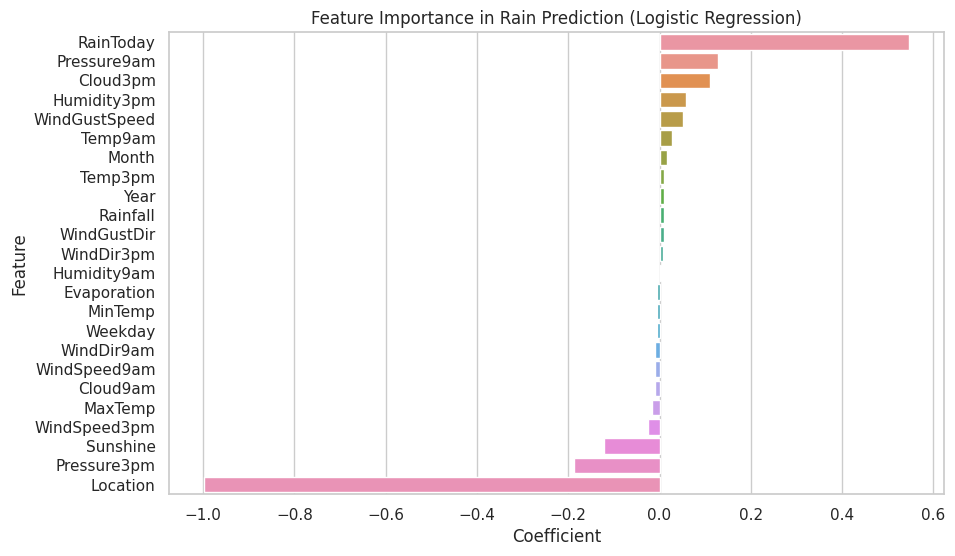

In [106]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients.sort_values(by='Coefficient', ascending=False))
plt.title('Feature Importance in Rain Prediction (Logistic Regression)')
plt.show()


Negative Coefficients:

Features like "Location," "MinTemp," and "Sunshine" show an inverse relationship with the target variable.
Positive Coefficients:

Features like "Rainfall," "Humidity3pm," and "RainToday" have a positive relationship with the target variable.

Feature Importance:

Larger absolute coefficients, such as for "RainToday," "Pressure3pm," and "Humidity3pm," indicate higher feature importance.


Lower temperatures, wind speed, and cloud cover are associated with the positive class.
Higher values of rainfall, humidity, and pressure increase the likelihood of the positive class.
"RainToday" has a significant impact on predictions.

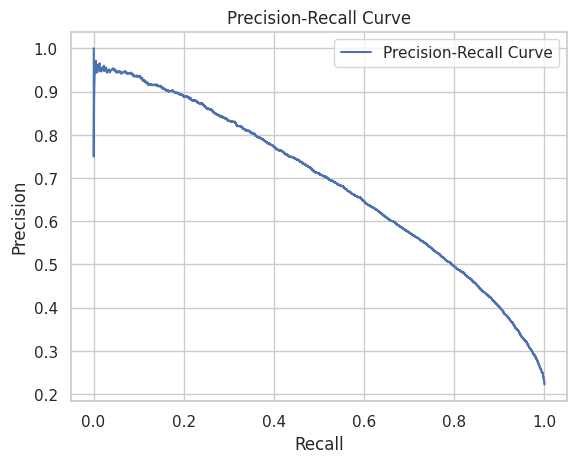

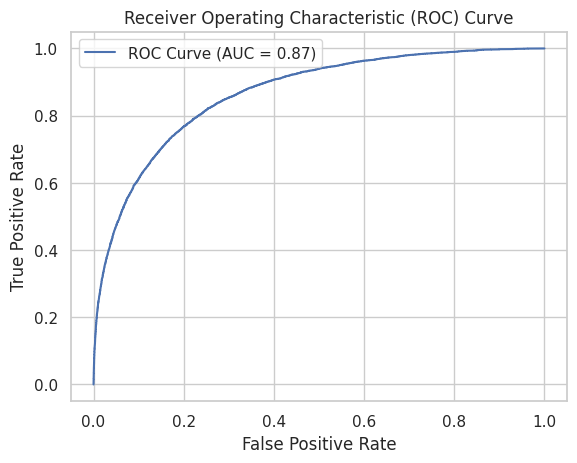

In [107]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_probs = model.predict_proba(X_test)[:, 1]

# Plot precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


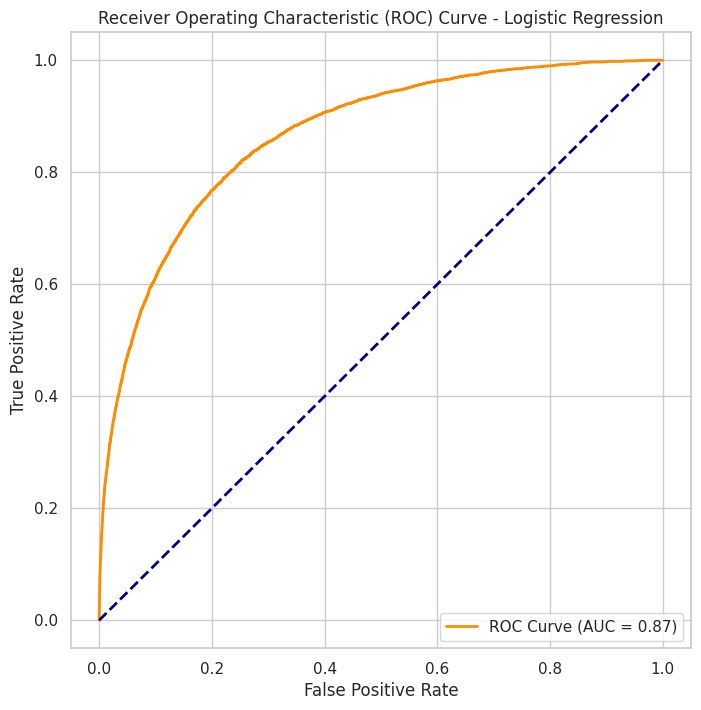

In [108]:
from sklearn.metrics import roc_curve, auc


# Get predicted probabilities for the positive class
y_probs_lr = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_probs_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()


An ROC-AUC of 0.87 suggests that the model has a strong ability to differentiate between the two classes.
The higher the ROC-AUC, the better the model is at correctly ranking the probabilities of instances from the positive and negative classes.

## KNN

Confusion Matrix:
[[20915   982]
 [ 3386  2875]]



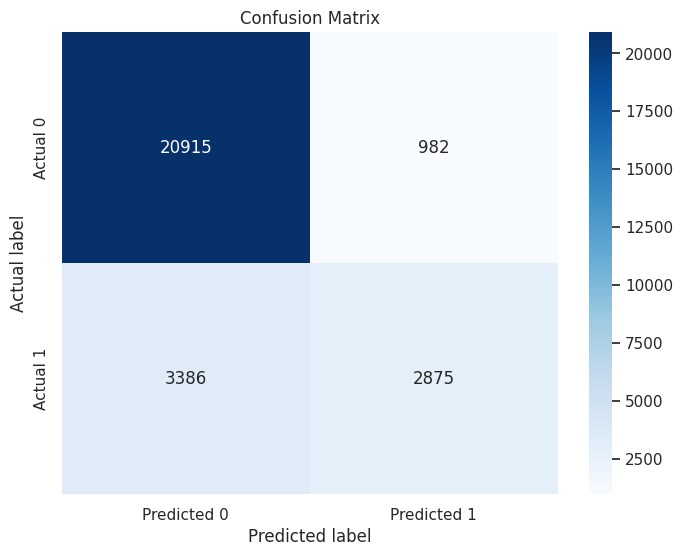



Accuracy: 0.84, Precision: 0.75, Recall: 0.46


ROC-AUC: 0.86


F1 Score: 0.57



Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91     21897
           1       0.75      0.46      0.57      6261

    accuracy                           0.84     28158
   macro avg       0.80      0.71      0.74     28158
weighted avg       0.84      0.84      0.83     28158



In [109]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Assuming 'X' contains your features and 'y' contains the target variable 'RainTomorrow'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (KNN is sensitive to the scale of features)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Instantiate KNN model
knn = KNeighborsClassifier()

# Hyperparameter tuning using GridSearchCV
param_grid = {'n_neighbors': [3, 5, 7, 9, 11,13, 15, 17]}
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_k = grid_search.best_params_['n_neighbors']

# Instantiate KNN model with the best K
knn = KNeighborsClassifier(n_neighbors=best_k)

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)

# Evaluate the model
evaluate_model(knn, X_test, y_test)


The KNN model demonstrates reasonable accuracy but shows limitations in correctly identifying positive instances, as reflected by the lower recall of 0.46 for class 1.
Precision of 0.75 suggests that when the model predicts a positive instance, it is correct 75% of the time.
The ROC-AUC of 0.86 is relatively high, indicating good discrimination between the two classes.
The F1 Score of 0.57 suggests a balance between precision and recall, similar to the logistic regression model.

Metrics for K=3 - Accuracy: 0.83, Precision: 0.66, Recall: 0.51, F1 Score: 0.57
Metrics for K=5 - Accuracy: 0.84, Precision: 0.69, Recall: 0.49, F1 Score: 0.57
Metrics for K=7 - Accuracy: 0.84, Precision: 0.72, Recall: 0.48, F1 Score: 0.58
Metrics for K=9 - Accuracy: 0.84, Precision: 0.73, Recall: 0.48, F1 Score: 0.58
Metrics for K=11 - Accuracy: 0.85, Precision: 0.74, Recall: 0.47, F1 Score: 0.58
Metrics for K=13 - Accuracy: 0.85, Precision: 0.74, Recall: 0.47, F1 Score: 0.57
Metrics for K=15 - Accuracy: 0.84, Precision: 0.75, Recall: 0.46, F1 Score: 0.57
Metrics for K=17 - Accuracy: 0.84, Precision: 0.75, Recall: 0.45, F1 Score: 0.56


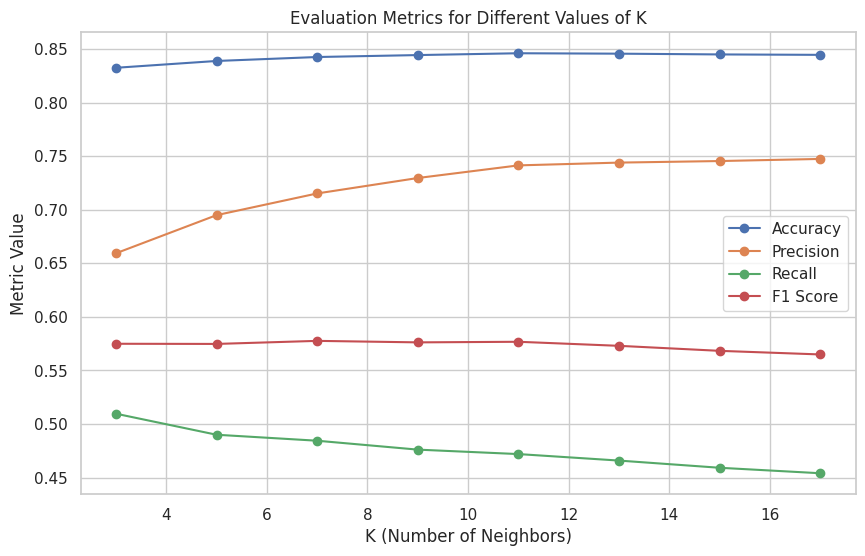

In [111]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Lists to store evaluation metrics
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Evaluate KNN for different values of K
k_values = [3, 5, 7, 9, 11, 13, 15, 17]

for k in k_values:
    # Create and fit KNN model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Make predictions
    y_pred = knn.predict(X_test)

    # Calculate and store accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Calculate and store precision
    precision = precision_score(y_test, y_pred)
    precisions.append(precision)

    # Calculate and store recall
    recall = recall_score(y_test, y_pred)
    recalls.append(recall)

    # Calculate and store F1 score
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

    # Print the metrics for each value of K
    print(f"Metrics for K={k} - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")

# Plot the metrics over different values of K
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, label='Accuracy', marker='o')
plt.plot(k_values, precisions, label='Precision', marker='o')
plt.plot(k_values, recalls, label='Recall', marker='o')
plt.plot(k_values, f1_scores, label='F1 Score', marker='o')

plt.title('Evaluation Metrics for Different Values of K')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Metric Value')
plt.legend()
plt.show()


Precision improvements with increasing K suggest a higher confidence in positive predictions, but this comes at the expense of capturing fewer true positives.
Recall decreases slightly, indicating a potential trade-off between precision and recall.
The F1 score stability suggests a consistent balance between precision and recall.

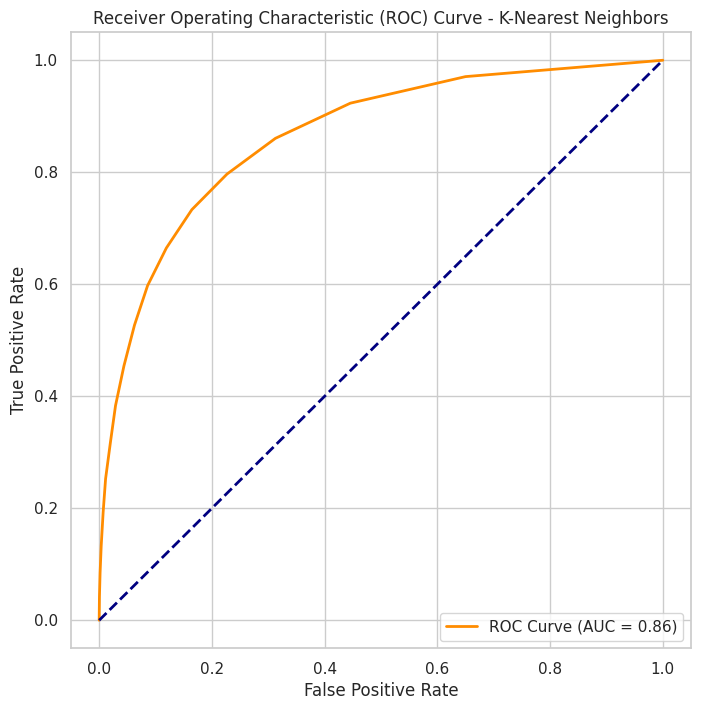

In [112]:
from sklearn.metrics import roc_curve, auc

# Assuming 'knn' is the trained K-Nearest Neighbors model

# Get predicted probabilities for the positive class
y_probs_knn = knn.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_probs_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - K-Nearest Neighbors')
plt.legend(loc="lower right")
plt.show()


## Naive Bayes

Confusion Matrix:
[[18685  3212]
 [ 2401  3860]]



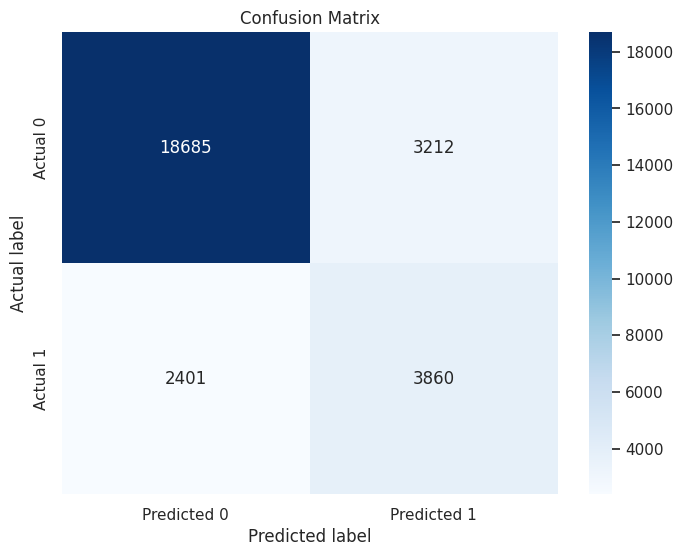



Accuracy: 0.80, Precision: 0.55, Recall: 0.62


ROC-AUC: 0.82


F1 Score: 0.58



Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87     21897
           1       0.55      0.62      0.58      6261

    accuracy                           0.80     28158
   macro avg       0.72      0.73      0.72     28158
weighted avg       0.81      0.80      0.80     28158



In [113]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming 'X' contains your features and 'y' contains the target variable 'RainTomorrow'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate Gaussian Naive Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
evaluate_model(nb_model, X_test, y_test)


The Naive Bayes model shows reasonable performance with an accuracy of 80%. It tends to have a better ability to correctly identify negative instances (class 0) than positive instances (class 1).
Precision of 0.55 indicates that the model, when predicting the positive class, has a moderate level of accuracy.
The ROC-AUC of 0.82 suggests good discriminatory power, but the trade-off between precision and recall should be considered.

In [114]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define a broader range of hyperparameters
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]}

# Instantiate Gaussian Naive Bayes model
nb_model = GaussianNB()

# Hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(nb_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_var_smoothing = grid_search.best_params_['var_smoothing']

# Instantiate Gaussian Naive Bayes model with the best hyperparameters
nb_model = GaussianNB(var_smoothing=best_var_smoothing)

# Train the model
nb_model.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test)

# Make predictions
y_pred_nb = nb_model.predict(X_test)

# Calculate and print ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_nb)
print(f"ROC-AUC: {roc_auc:.2f}")

# Calculate and print F1 Score
f1 = f1_score(y_test, y_pred_nb)
print(f"F1 Score: {f1:.2f}")

# Evaluate the model using classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))


ROC-AUC: 0.69
F1 Score: 0.53
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.90     21897
           1       0.68      0.44      0.53      6261

    accuracy                           0.83     28158
   macro avg       0.77      0.69      0.71     28158
weighted avg       0.82      0.83      0.82     28158



Comparison:

The new ROC-AUC of 0.69 is lower than the previous value of 0.82, indicating a decrease in the model's ability to distinguish between the two classes.
The new F1 Score of 0.53 is also lower than the previous value of 0.58, suggesting a decline in the balance between precision and recall.
In the classification report, there is a notable drop in recall (sensitivity) for class 1 (positive class), which may contribute to the lower F1 Score.
The precision for class 1 has improved slightly, but at the cost of a decrease in recall.
Analysis:

The updated model seems to have a higher precision for predicting positive instances (class 1) but at the expense of lower recall, resulting in a lower F1 Score.
The overall accuracy has improved from 0.80 to 0.83, but it's important to note that accuracy alone might not provide a complete picture, especially in imbalanced datasets.

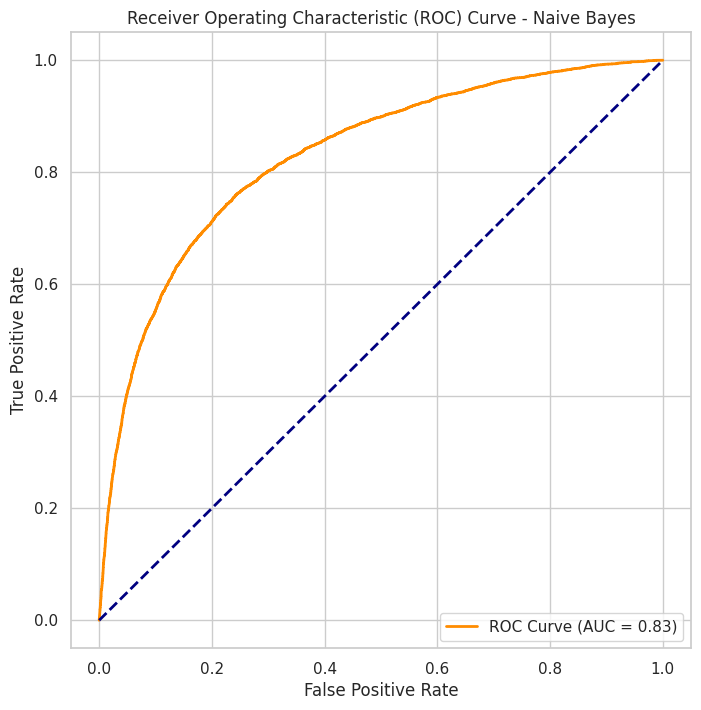

In [115]:
from sklearn.metrics import roc_curve, auc

# Assuming 'nb_model' is the trained Gaussian Naive Bayes model

# Get predicted probabilities for the positive class
y_probs_nb = nb_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_probs_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Naive Bayes')
plt.legend(loc="lower right")
plt.show()


# SVM


In [116]:


def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f'Confusion Matrix:\n{cm}\n')

    # Plotting Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix')
    plt.show()
    print('\n')

    # Accuracy, Precision, Recall
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}')
    print('\n')

    # Decision function for probability estimates
    decision_values = model.decision_function(X_test)
    # Scale decision values to [0, 1]
    decision_values_scaled = (decision_values - decision_values.min()) / (decision_values.max() - decision_values.min())

    # ROC Curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, decision_values_scaled)
    auc = roc_auc_score(y_test, decision_values_scaled)
    print(f'ROC-AUC: {auc:.2f}')
    print('\n')

    # F1 and F-beta Score
    f1 = f1_score(y_test, y_pred)
    print(f'F1 Score: {f1:.2f}')
    print('\n')

    # Full classification report
    print('\nClassification Report:\n', classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Confusion Matrix:
[[21878    19]
 [ 5960   301]]



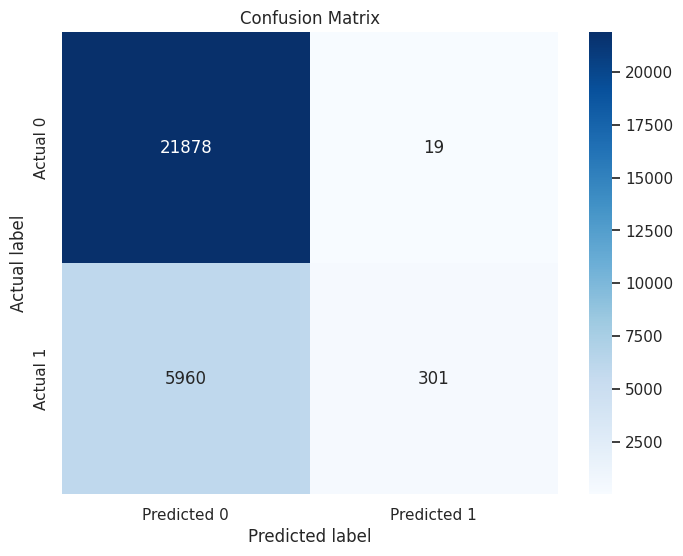



Accuracy: 0.79, Precision: 0.94, Recall: 0.05


ROC-AUC: 0.87


F1 Score: 0.09



Classification Report:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88     21897
           1       0.94      0.05      0.09      6261

    accuracy                           0.79     28158
   macro avg       0.86      0.52      0.49     28158
weighted avg       0.82      0.79      0.70     28158



In [117]:
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming 'X' contains your features and 'y' contains the target variable 'RainTomorrow'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = svm.LinearSVC()

clf.fit(X_train, y_train)

y_pred_svm = clf.predict(X_test)

evaluate_model(clf, X_test, y_test)


The model demonstrates good accuracy, especially in correctly predicting instances of class 0 (negative class).
Precision is higher for class 0, suggesting fewer false positives in predicting instances of class 0.
Recall for class 1 is lower, indicating that the model struggles to capture all instances of the positive class.
The F1 Score for class 1 is relatively lower, reflecting the imbalance between precision and recall.

In [118]:
'''from sklearn.model_selection import GridSearchCV

# Define hyperparameters (if any)
param_grid = {'C': [1, 10, 100],
              'penalty': ['l2'],
              'loss': ['squared_hinge'],
              'dual': [True, False],
              'max_iter':[10000]}

# Instantiate Gaussian Naive Bayes model
clf = svm.LinearSVC()

# Hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print(best_params)

# Instantiate Gaussian Naive Bayes model with the best hyperparameters
clf = svm.LinearSVC(C = best_params['C'], penalty = best_params['penalty'],
                    loss = best_params['loss'], dual = best_params['dual'])

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred_svm = clf.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_nb)
print(f"Accuracy: {accuracy_svm:.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))'''

'from sklearn.model_selection import GridSearchCV\n\n# Define hyperparameters (if any)\nparam_grid = {\'C\': [1, 10, 100],\n              \'penalty\': [\'l2\'],\n              \'loss\': [\'squared_hinge\'],\n              \'dual\': [True, False],\n              \'max_iter\':[10000]}\n\n# Instantiate Gaussian Naive Bayes model\nclf = svm.LinearSVC()\n\n# Hyperparameter tuning using GridSearchCV\ngrid_search = GridSearchCV(clf, param_grid, cv=5, scoring=\'accuracy\')\ngrid_search.fit(X_train, y_train)\n\n# Best hyperparameters\nbest_params = grid_search.best_params_\nprint(best_params)\n\n# Instantiate Gaussian Naive Bayes model with the best hyperparameters\nclf = svm.LinearSVC(C = best_params[\'C\'], penalty = best_params[\'penalty\'],\n                    loss = best_params[\'loss\'], dual = best_params[\'dual\'])\n\n# Train the model\nclf.fit(X_train, y_train)\n\n# Make predictions\ny_pred_svm = clf.predict(X_test)\n\n# Evaluate the model\naccuracy_svm = accuracy_score(y_test, y_pred

### Undersampling

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [120]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Function to visualize class distribution
def plot_class_distribution(y, title):
    sns.countplot(x=y)
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.show()

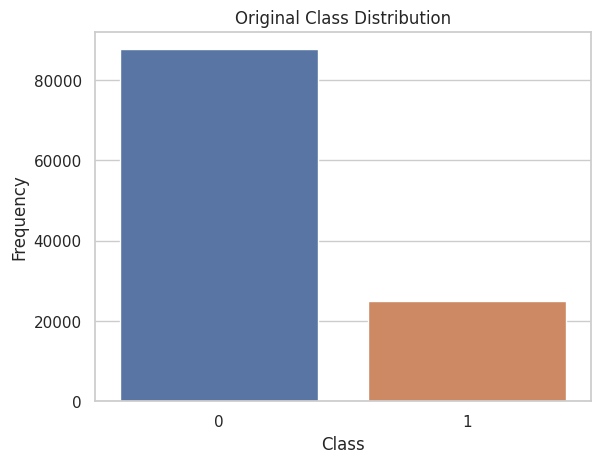

In [121]:
# Visualize original class distribution
plot_class_distribution(y_train, 'Original Class Distribution')

In [122]:
# First, applying undersampling
under = RandomUnderSampler(sampling_strategy= 1.0)
X_under, y_under = under.fit_resample(X_train, y_train)

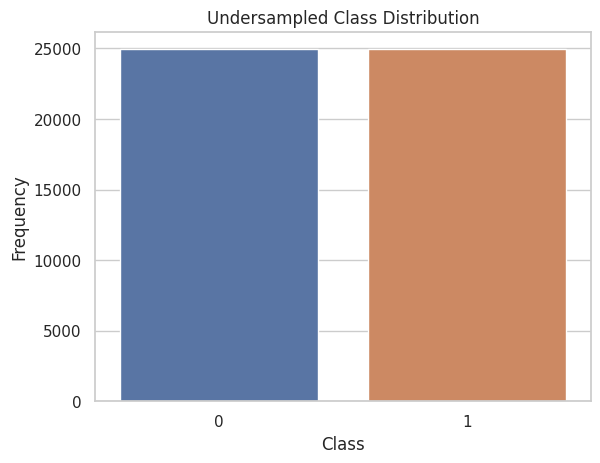

In [123]:
plot_class_distribution(y_under, 'Undersampled Class Distribution')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression on Undersampled Data Metrics:

Confusion Matrix:
[[17372  4525]
 [ 1443  4818]]



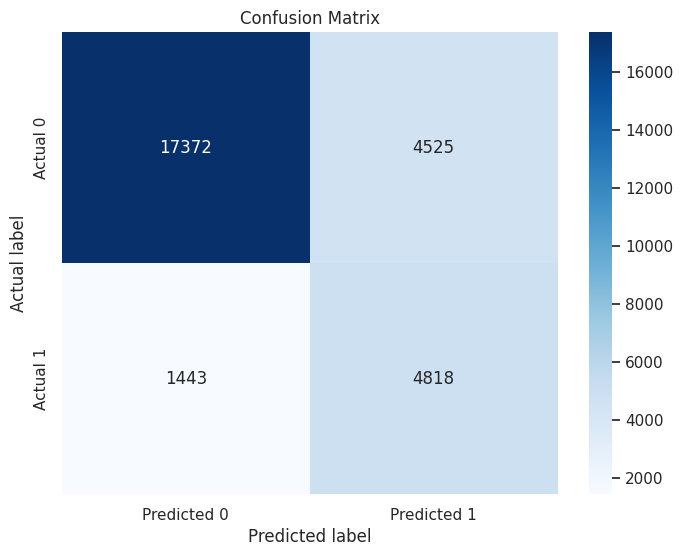



Accuracy: 0.79, Precision: 0.52, Recall: 0.77


ROC-AUC: 0.86


F1 Score: 0.62



Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.79      0.85     21897
           1       0.52      0.77      0.62      6261

    accuracy                           0.79     28158
   macro avg       0.72      0.78      0.74     28158
weighted avg       0.83      0.79      0.80     28158



In [124]:
# Fit and evaluate logistic regression model on undersampled data
logreg_under = LogisticRegression(random_state=42)
logreg_under.fit(X_under, y_under)
print('Logistic Regression on Undersampled Data Metrics:\n')
evaluate_model(logreg_under, X_test, y_test)

The model performs well in capturing positive instances, as evidenced by the high recall for class 1.
Precision for class 1 is moderate, suggesting that there might be some false positives in predicting positive instances.
The ROC-AUC of 0.86 indicates good discriminatory power, supporting the model's ability to distinguish between the two classes.
The F1 Score provides a balanced view of precision and recall, with the model achieving a satisfactory balance for both classes.

### Oversampling

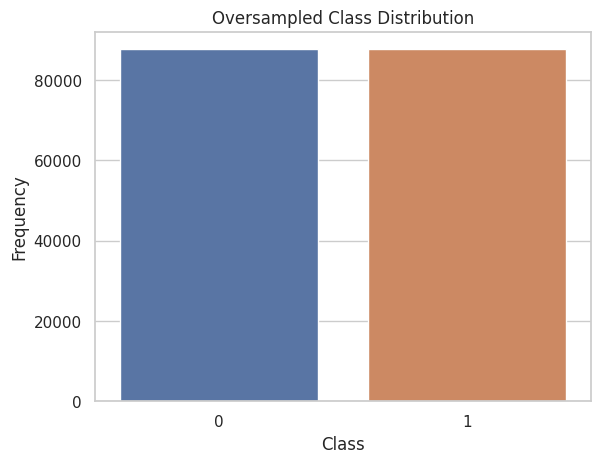

In [125]:
# Now oversampling
over = SMOTE(sampling_strategy=1.0)
X_over, y_over = over.fit_resample(X_train, y_train)
# Visualize oversampled class distribution
plot_class_distribution(y_over, 'Oversampled Class Distribution')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression on Oversampled Data Metrics:

Confusion Matrix:
[[17252  4645]
 [ 1444  4817]]



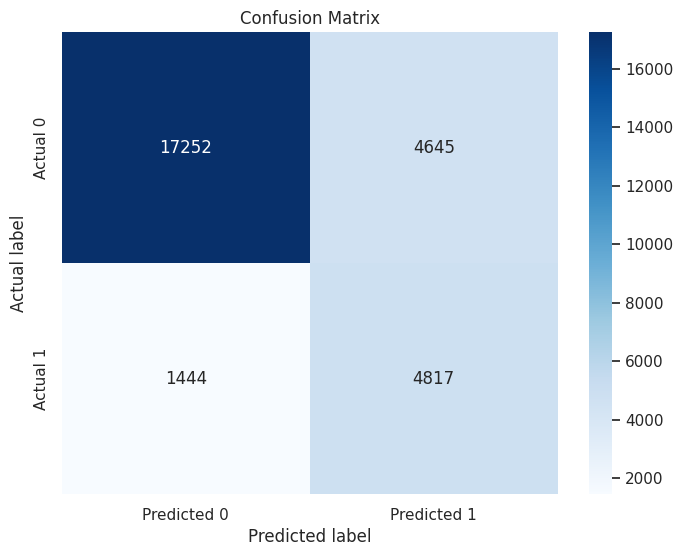



Accuracy: 0.78, Precision: 0.51, Recall: 0.77


ROC-AUC: 0.86


F1 Score: 0.61



Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.79      0.85     21897
           1       0.51      0.77      0.61      6261

    accuracy                           0.78     28158
   macro avg       0.72      0.78      0.73     28158
weighted avg       0.83      0.78      0.80     28158



In [126]:
# Fit and evaluate logistic regression model on oversampled data
logreg_over = LogisticRegression(random_state=42)
logreg_over.fit(X_over, y_over)
print('\nLogistic Regression on Oversampled Data Metrics:\n')
evaluate_model(logreg_over, X_test, y_test)

The model, trained on oversampled data, demonstrates performance similar to the model trained on undersampled data.
It performs well in capturing positive instances, as evidenced by the high recall for class 1.
Precision for class 1 is moderate, indicating that there might be some false positives in predicting positive instances.
The ROC-AUC of 0.86 indicates good discriminatory power, supporting the model's ability to distinguish between the two classes.
The F1 Score provides a balanced view of precision and recall, with the model achieving a satisfactory balance for both classes.

# Model Comparison

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


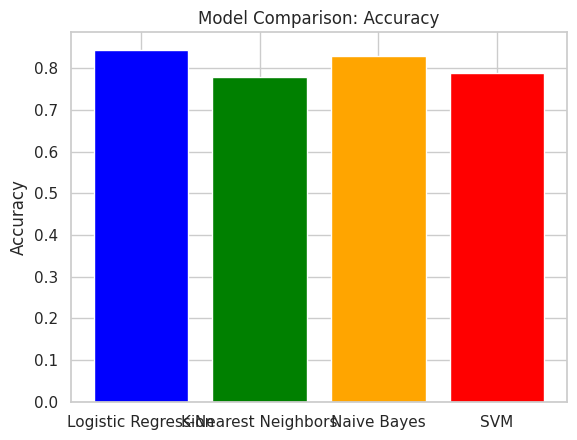

In [127]:
# List of models
models = [model, knn, nb_model, clf]
model_names = ['Logistic Regression', 'K-Nearest Neighbors', 'Naive Bayes', 'SVM']

# Compare models based on a common metric (e.g., accuracy)
accuracies = [accuracy_score(y_test, model.predict(X_test)) for model in models]

# Plot a bar chart to compare accuracies
import matplotlib.pyplot as plt

plt.bar(model_names, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.ylabel('Accuracy')
plt.title('Model Comparison: Accuracy')
plt.show()
